# Visualizaciones Univariadas: Predictores de Divorcio

## Objetivo
Crear visualizaciones comprehensivas de cada variable individual del dataset de Predictores de Divorcio para:
- Entender la distribución de cada característica
- Identificar patrones, outliers y formas de distribución
- Comparar distribuciones entre grupos (divorciados vs no divorciados)
- Evaluar normalidad y asimetría

## Estructura del Análisis

### 1. Variable Objetivo (Divorce)
- Gráfico de barras con conteos
- Gráfico de pastel con porcentajes
- Análisis de balance de clases

### 2. Distribuciones Individuales
- Histogramas con KDE overlay
- Boxplots para identificar cuartiles y outliers
- Violin plots divididos por estado de divorcio

### 3. Análisis de Forma
- Resumen de asimetría (skewness)
- Q-Q plots para features principales
- Identificación de distribuciones normales vs sesgadas

In [1]:
# Importar librerías
import sys
sys.path.append('../scripts')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Importar utilidades personalizadas
from visualization_utils import (
    setup_plot_style,
    plot_distribution,
    plot_by_group,
    plot_boxplot,
    save_plot,
    create_qq_plot,
    interpret_distribution,
    COLORS,
    FONT_SIZES
)

# Configurar estilo
setup_plot_style()
%matplotlib inline

print("✅ Librerías y utilidades cargadas correctamente")

✅ Librerías y utilidades cargadas correctamente


In [2]:
# Cargar datos limpios
df = pd.read_csv('../data/processed/divorce_clean.csv')

print(f"📊 Dataset cargado:")
print(f"   Forma: {df.shape}")
print(f"   Features: {df.shape[1] - 1}")
print(f"   Instancias: {df.shape[0]}")

# Identificar features
features = [col for col in df.columns if col != 'Divorce']
print(f"\n📋 Total de features a visualizar: {len(features)}")

📊 Dataset cargado:
   Forma: (150, 55)
   Features: 54
   Instancias: 150

📋 Total de features a visualizar: 54


## 1. Visualización de la Variable Objetivo

Analizamos la distribución de la variable objetivo (Divorce) para entender el balance de clases.

💾 Gráfico guardado: ../visualizations/univariate/target_distribution.png


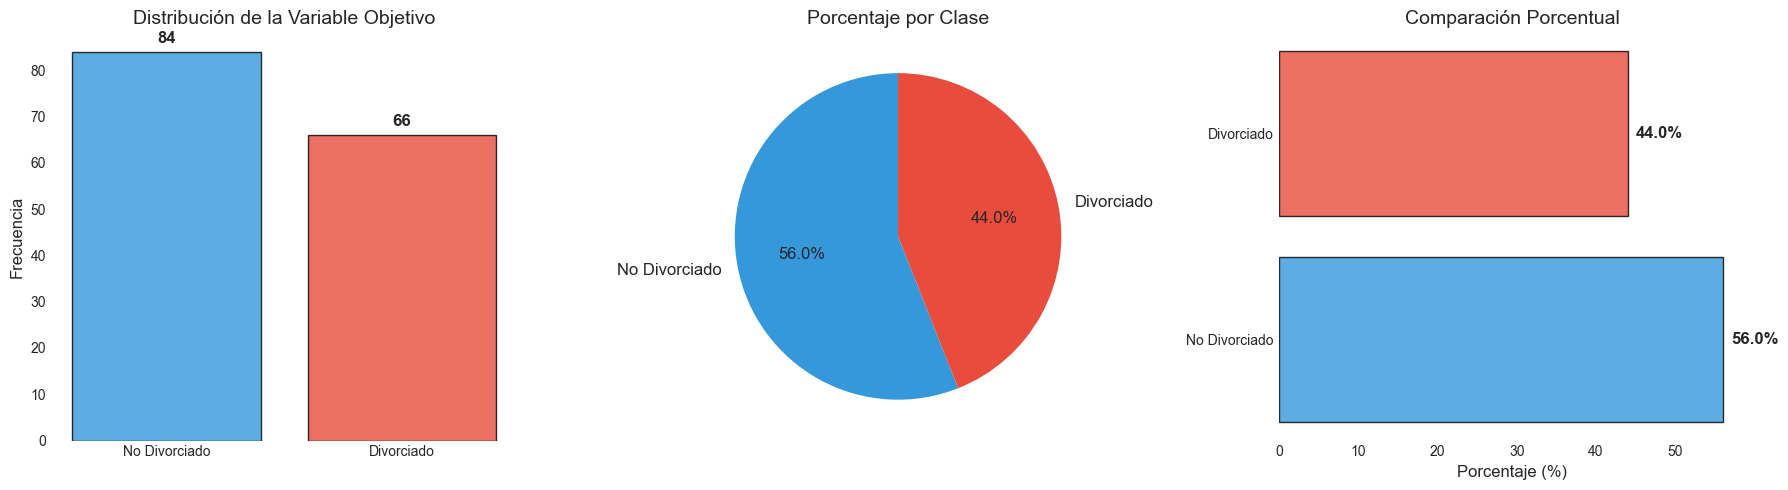


📊 Balance de Clases:
   No Divorciado: 84 (56.0%)
   Divorciado: 66 (44.0%)

💡 Interpretación: El dataset está balanceado


In [3]:
# Visualización de la variable objetivo
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Gráfico de barras
divorce_counts = df['Divorce'].value_counts().sort_index()
axes[0].bar(['No Divorciado', 'Divorciado'], divorce_counts.values, 
            color=[COLORS['no_divorce'], COLORS['divorce']], alpha=0.8, edgecolor='black')
axes[0].set_ylabel('Frecuencia', fontsize=FONT_SIZES['label'])
axes[0].set_title('Distribución de la Variable Objetivo', fontsize=FONT_SIZES['title'])
axes[0].grid(True, alpha=0.3, axis='y')

# Agregar valores sobre las barras
for i, v in enumerate(divorce_counts.values):
    axes[0].text(i, v + 2, str(v), ha='center', fontsize=FONT_SIZES['label'], fontweight='bold')

# 2. Gráfico de pastel
divorce_pct = df['Divorce'].value_counts(normalize=True).sort_index() * 100
axes[1].pie(divorce_pct.values, labels=['No Divorciado', 'Divorciado'], 
            autopct='%1.1f%%', colors=[COLORS['no_divorce'], COLORS['divorce']],
            startangle=90, textprops={'fontsize': FONT_SIZES['label']})
axes[1].set_title('Porcentaje por Clase', fontsize=FONT_SIZES['title'])

# 3. Comparación porcentual
axes[2].barh(['No Divorciado', 'Divorciado'], divorce_pct.values,
             color=[COLORS['no_divorce'], COLORS['divorce']], alpha=0.8, edgecolor='black')
axes[2].set_xlabel('Porcentaje (%)', fontsize=FONT_SIZES['label'])
axes[2].set_title('Comparación Porcentual', fontsize=FONT_SIZES['title'])
axes[2].grid(True, alpha=0.3, axis='x')

# Agregar valores
for i, v in enumerate(divorce_pct.values):
    axes[2].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=FONT_SIZES['label'], fontweight='bold')

plt.tight_layout()
save_plot(fig, 'target_distribution.png')
plt.show()

print(f"\n📊 Balance de Clases:")
print(f"   No Divorciado: {divorce_counts[0]} ({divorce_pct[0]:.1f}%)")
print(f"   Divorciado: {divorce_counts[1]} ({divorce_pct[1]:.1f}%)")
print(f"\n💡 Interpretación: El dataset está {'balanceado' if abs(divorce_pct[0] - 50) < 10 else 'ligeramente desbalanceado'}")

## 2. Distribuciones Individuales - Histogramas

Visualizamos la distribución de cada feature usando histogramas con KDE overlay.

💾 Gráfico guardado: ../visualizations/univariate/histograms_grid_01.png


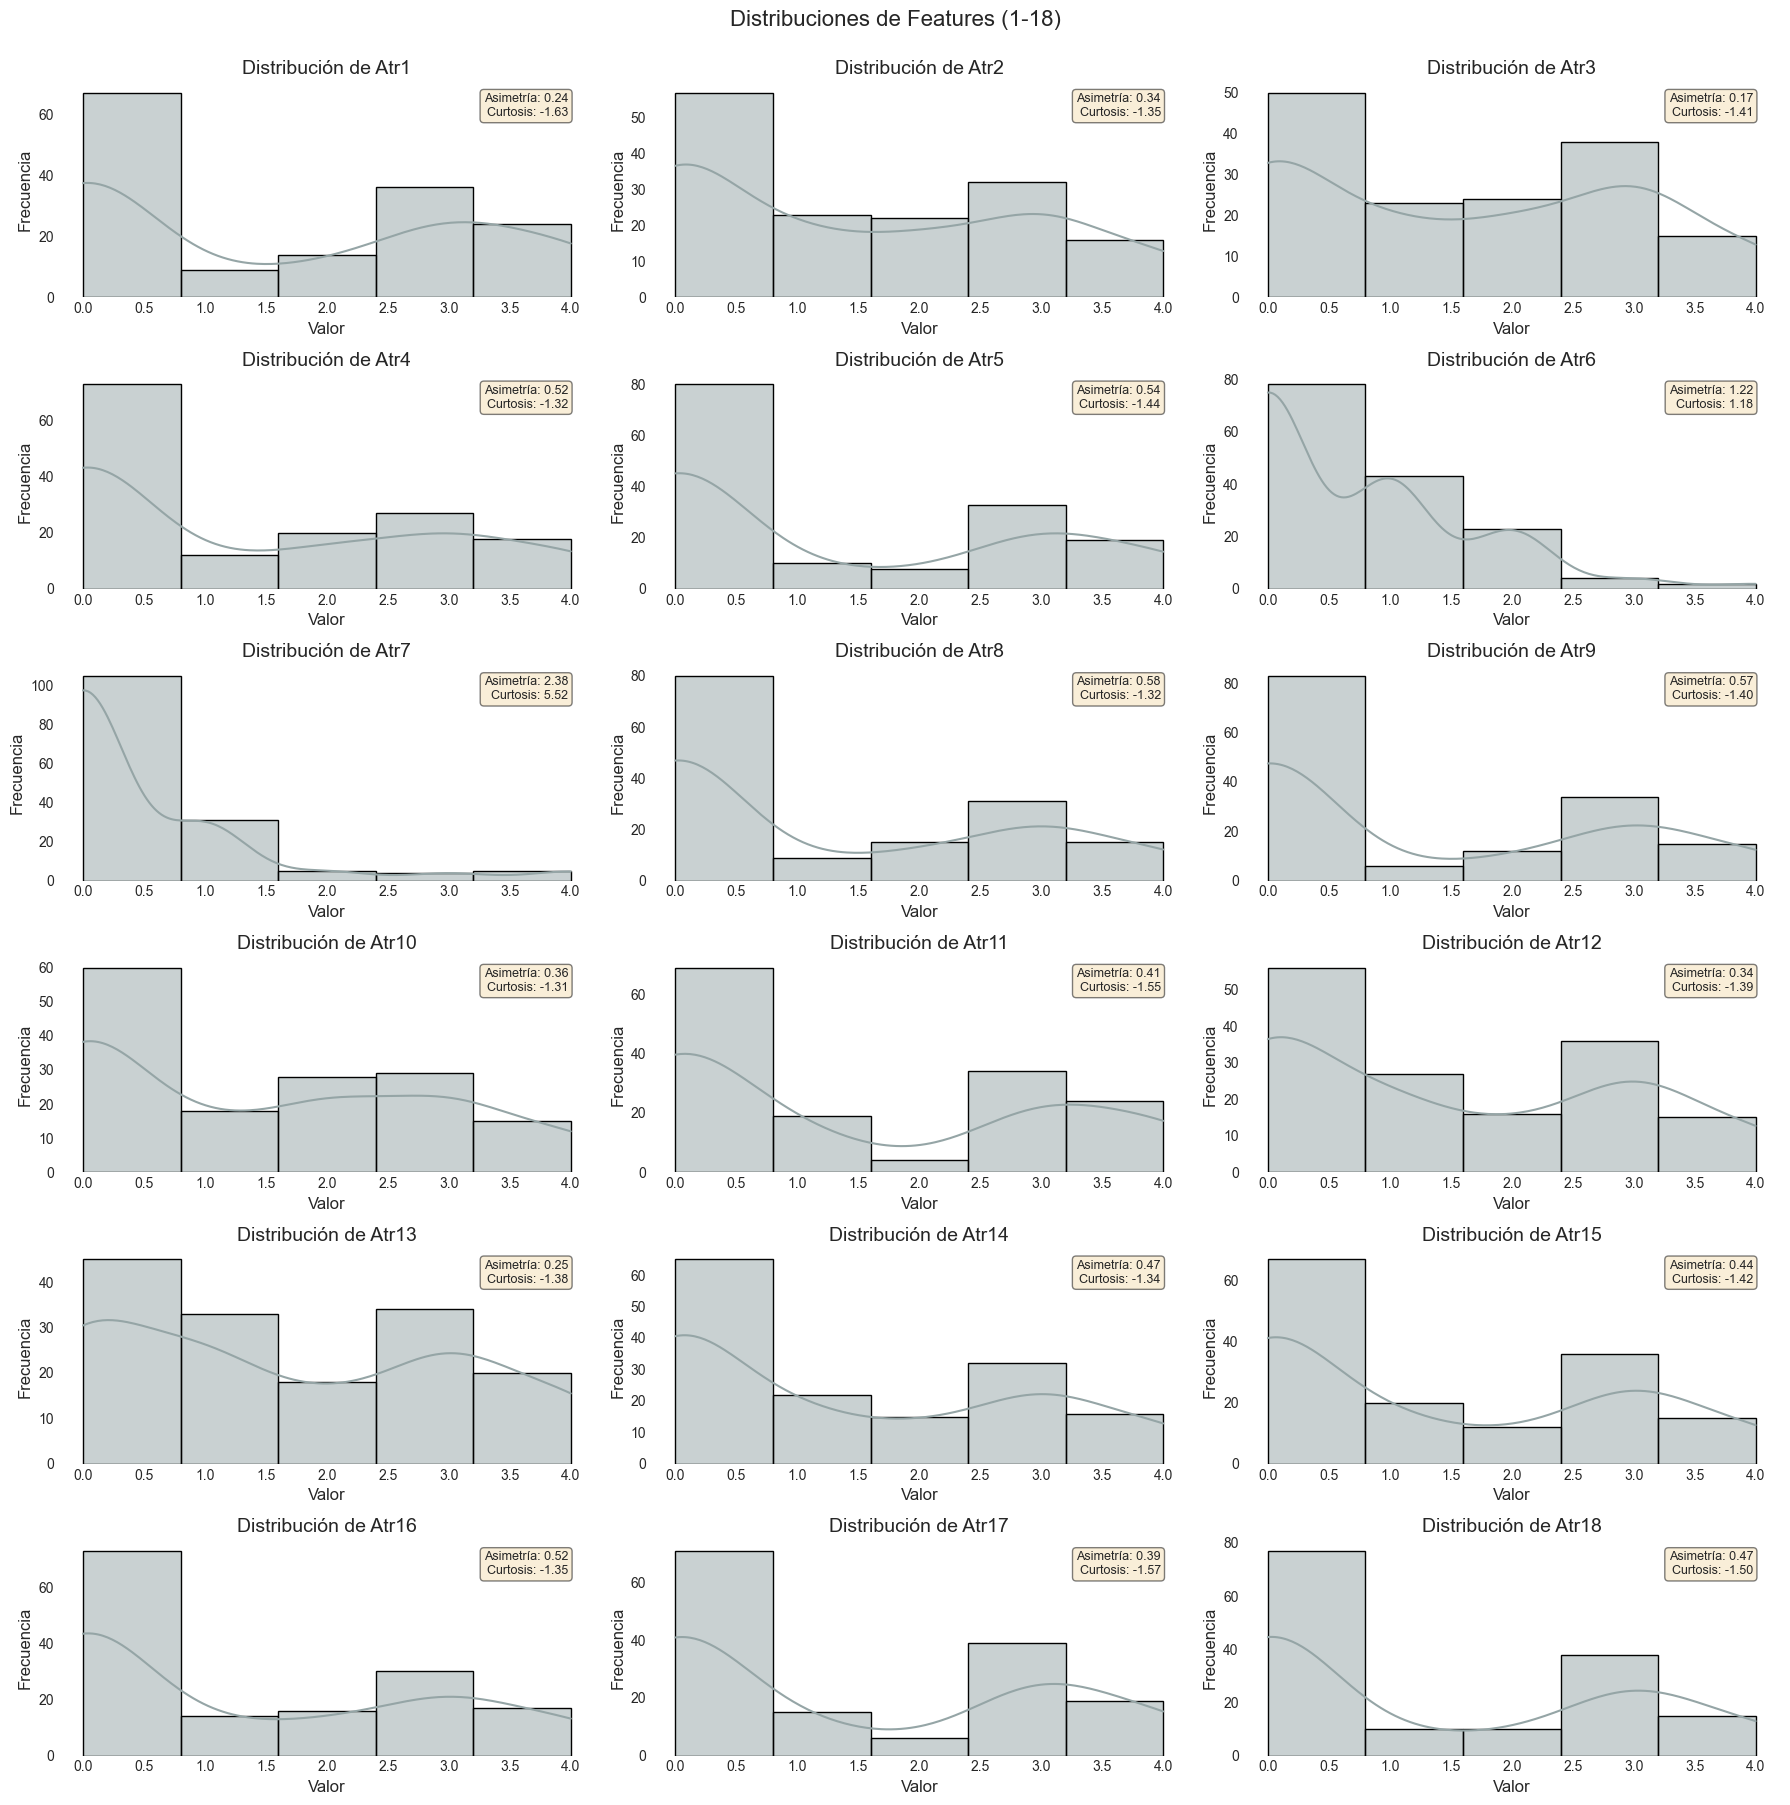

✅ Grid 1 de histogramas creado (Features 1-18)


In [4]:
# Histogramas en grids de 3x3 (primeras 18 features como ejemplo)
n_features_to_plot = 18
n_cols = 3
n_rows = int(np.ceil(n_features_to_plot / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 18))
axes = axes.ravel()

for idx, feature in enumerate(features[:n_features_to_plot]):
    plot_distribution(df, feature, ax=axes[idx], show_kde=True)
    
    # Calcular estadísticas
    skew = df[feature].skew()
    kurt = df[feature].kurtosis()
    
    # Agregar interpretación
    interpretation = interpret_distribution(skew, kurt)
    axes[idx].text(0.95, 0.95, f'Asimetría: {skew:.2f}\nCurtosis: {kurt:.2f}',
                   transform=axes[idx].transAxes, fontsize=9,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Distribuciones de Features (1-18)', fontsize=16, y=1.00)
plt.tight_layout()
save_plot(fig, 'histograms_grid_01.png')
plt.show()

print("✅ Grid 1 de histogramas creado (Features 1-18)")

💾 Gráfico guardado: ../visualizations/univariate/histograms_grid_02.png


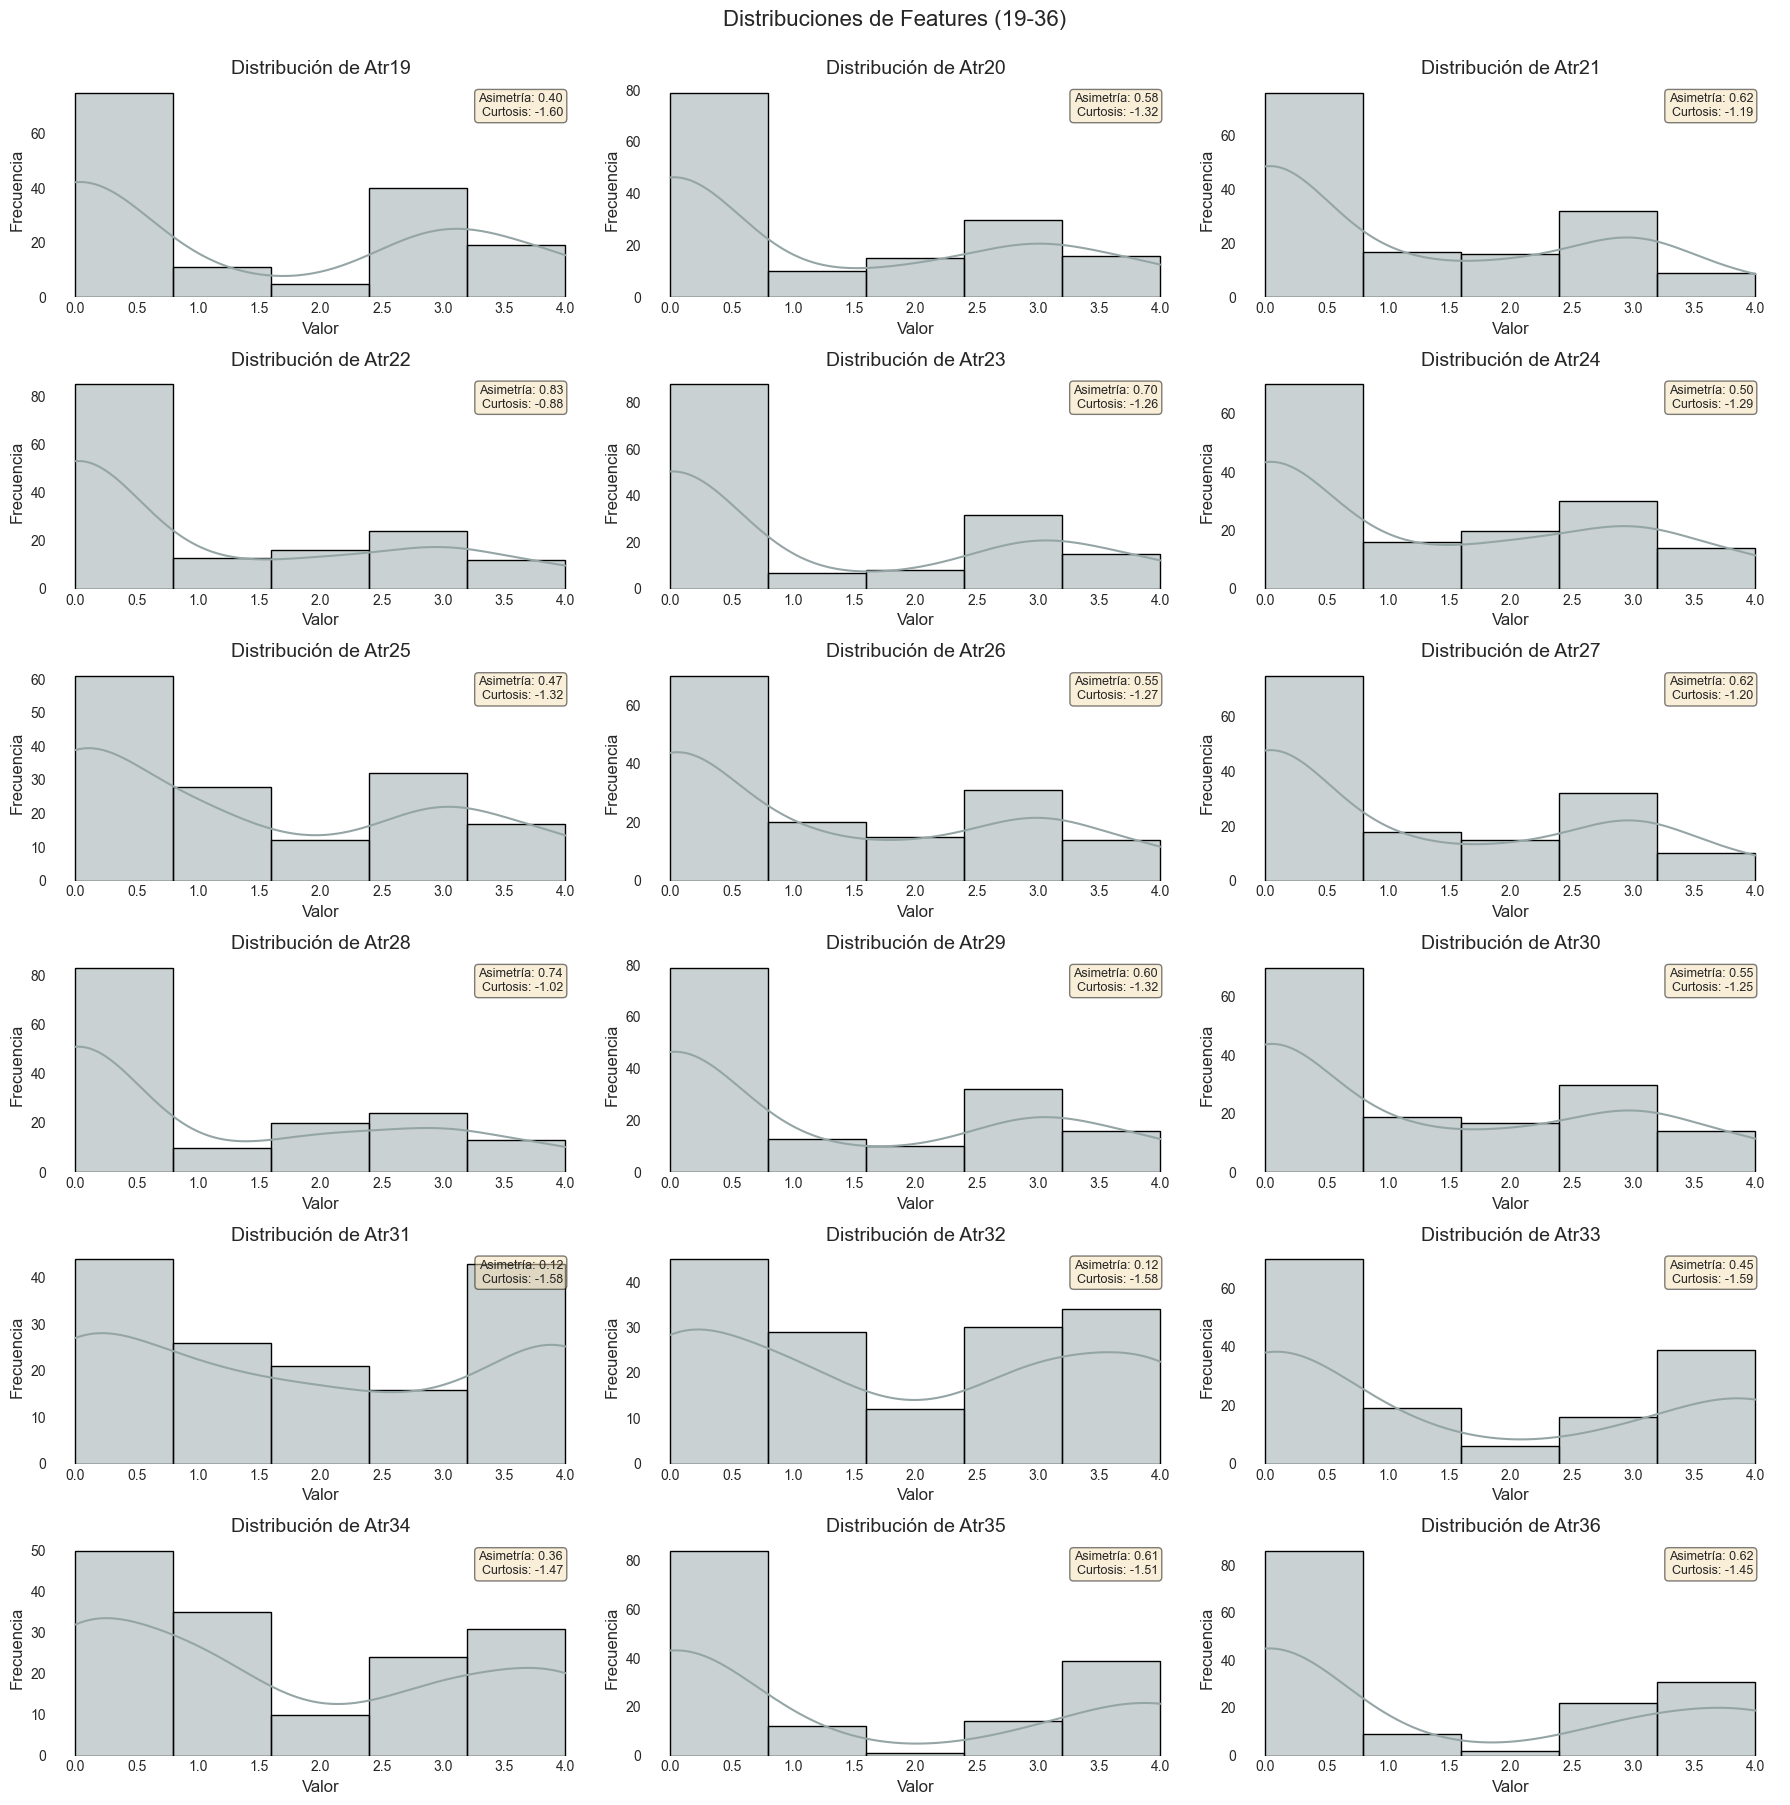

✅ Grid 2 de histogramas creado (Features 19-36)


In [5]:
# Segundo grid (features 19-36)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 18))
axes = axes.ravel()

for idx, feature in enumerate(features[18:36]):
    plot_distribution(df, feature, ax=axes[idx], show_kde=True)
    
    skew = df[feature].skew()
    kurt = df[feature].kurtosis()
    
    axes[idx].text(0.95, 0.95, f'Asimetría: {skew:.2f}\nCurtosis: {kurt:.2f}',
                   transform=axes[idx].transAxes, fontsize=9,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Distribuciones de Features (19-36)', fontsize=16, y=1.00)
plt.tight_layout()
save_plot(fig, 'histograms_grid_02.png')
plt.show()

print("✅ Grid 2 de histogramas creado (Features 19-36)")

💾 Gráfico guardado: ../visualizations/univariate/histograms_grid_03.png


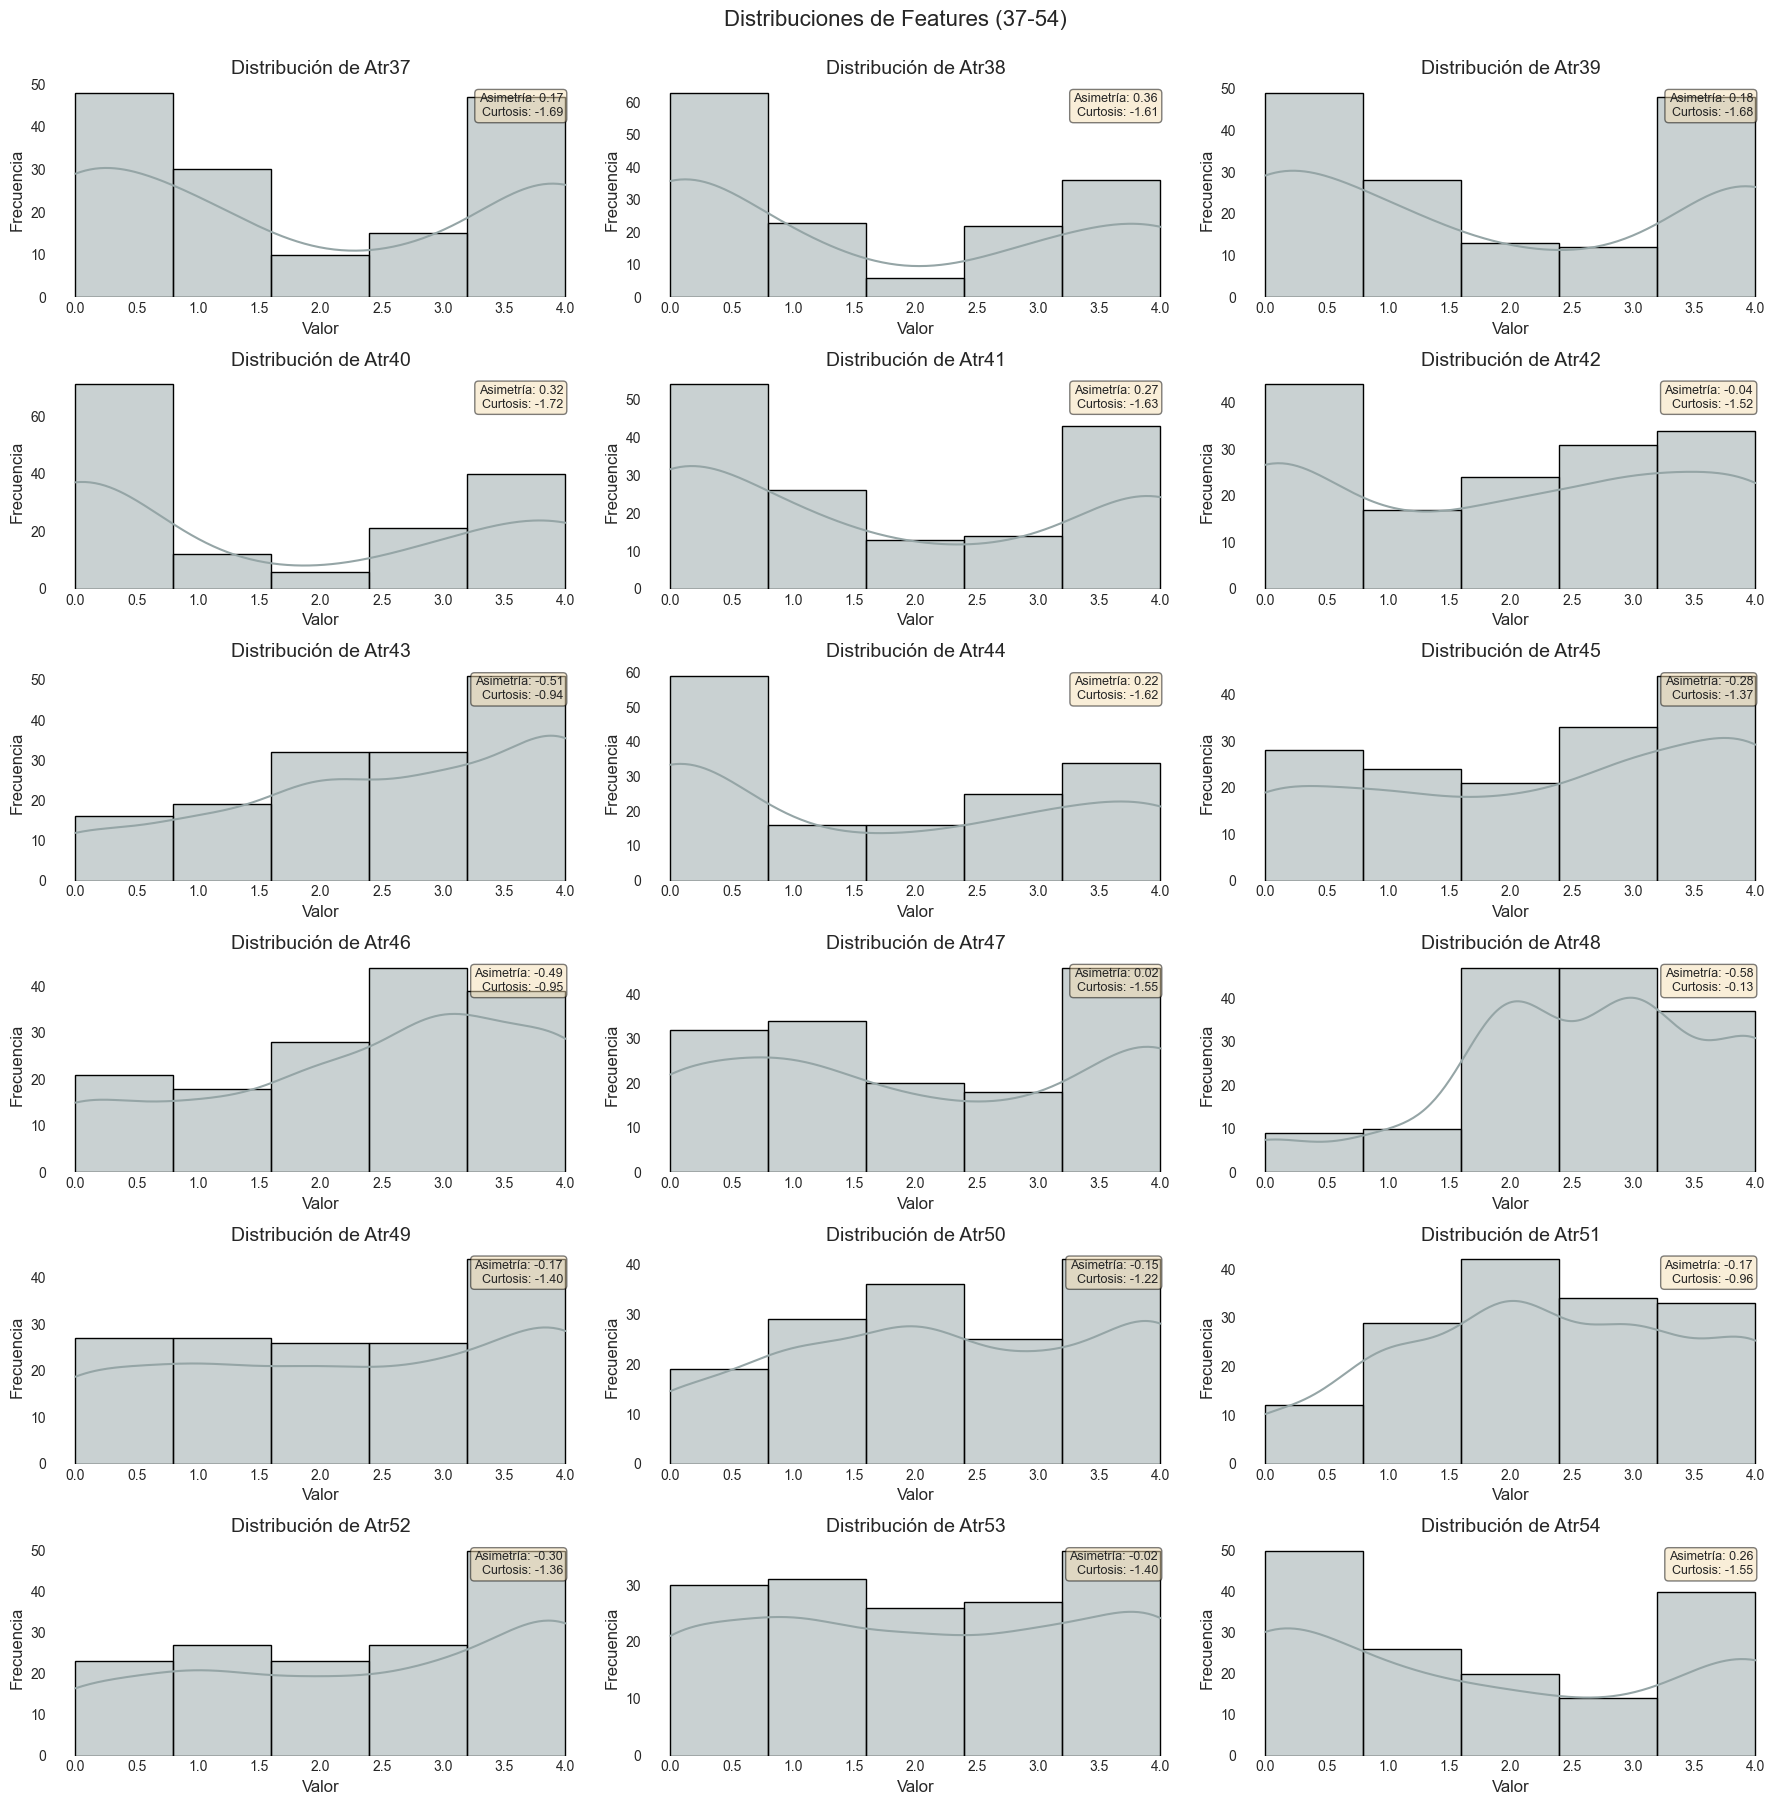

✅ Grid 3 de histogramas creado (Features 37-54)


In [6]:
# Tercer grid (features 37-54)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 18))
axes = axes.ravel()

for idx, feature in enumerate(features[36:54]):
    plot_distribution(df, feature, ax=axes[idx], show_kde=True)
    
    skew = df[feature].skew()
    kurt = df[feature].kurtosis()
    
    axes[idx].text(0.95, 0.95, f'Asimetría: {skew:.2f}\nCurtosis: {kurt:.2f}',
                   transform=axes[idx].transAxes, fontsize=9,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Distribuciones de Features (37-54)', fontsize=16, y=1.00)
plt.tight_layout()
save_plot(fig, 'histograms_grid_03.png')
plt.show()

print("✅ Grid 3 de histogramas creado (Features 37-54)")

## 3. Boxplots - Identificación de Outliers y Cuartiles

Los boxplots nos permiten visualizar la mediana, cuartiles y valores atípicos de cada feature.

💾 Gráfico guardado: ../visualizations/univariate/boxplots_grid_01.png


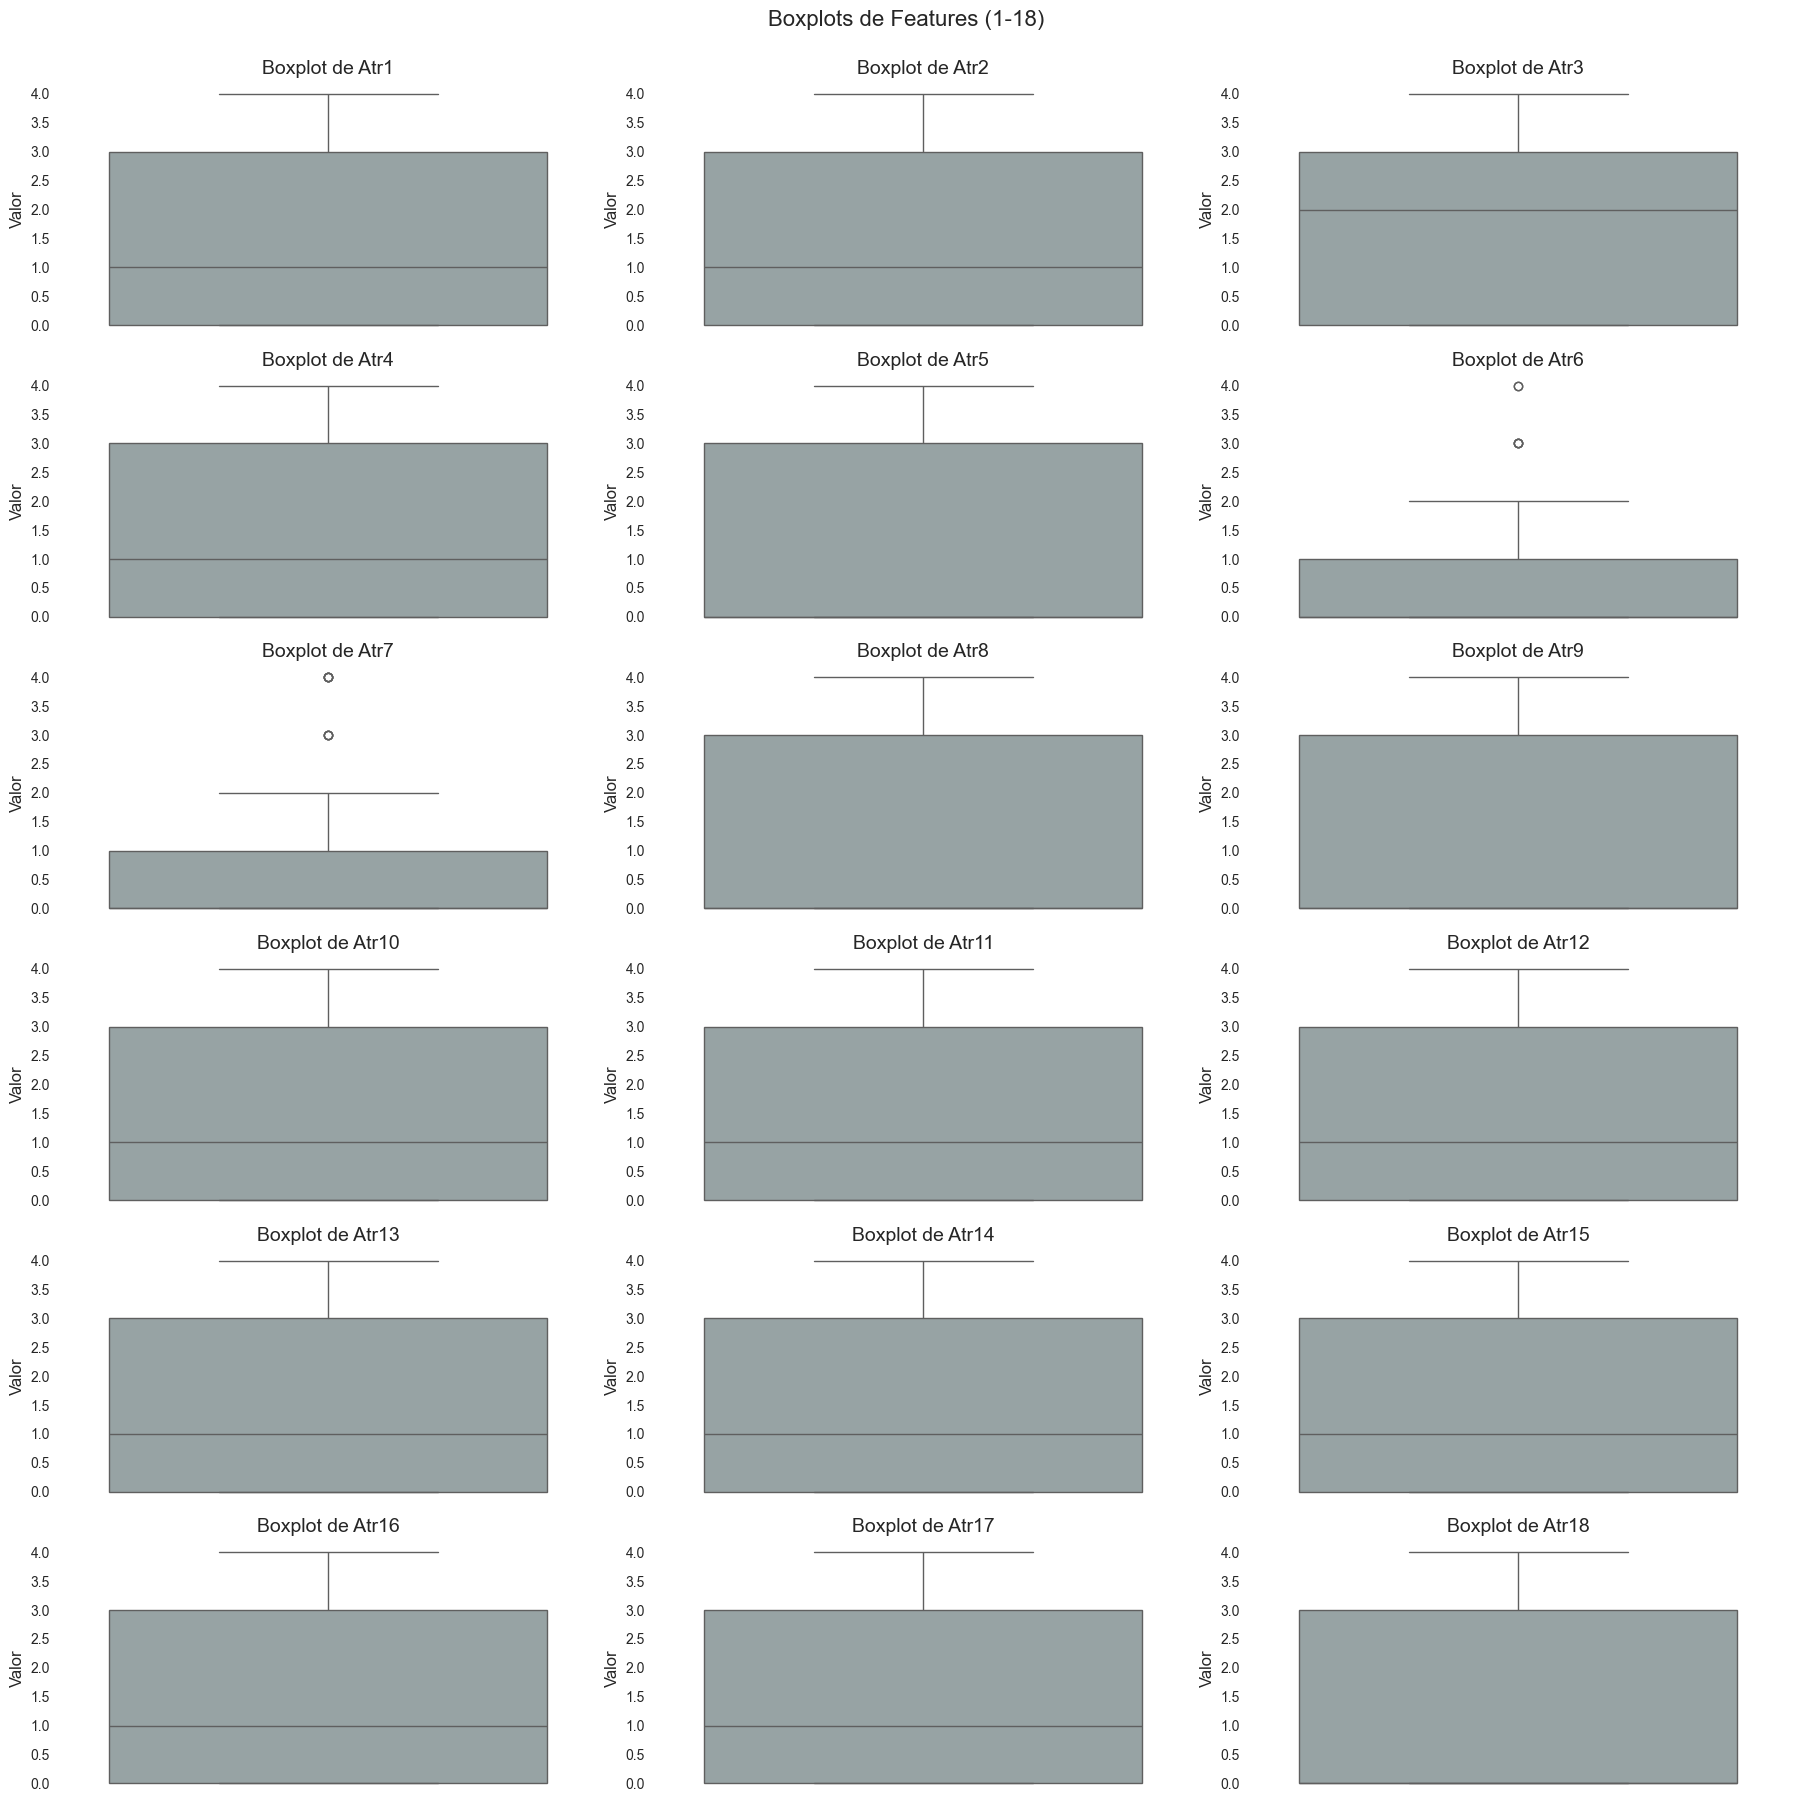

✅ Grid 1 de boxplots creado


In [7]:
# Boxplots en grids (primeras 18 features)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 18))
axes = axes.ravel()

for idx, feature in enumerate(features[:18]):
    plot_boxplot(df, feature, ax=axes[idx])

plt.suptitle('Boxplots de Features (1-18)', fontsize=16, y=1.00)
plt.tight_layout()
save_plot(fig, 'boxplots_grid_01.png')
plt.show()

print("✅ Grid 1 de boxplots creado")

## 4. Violin Plots - Comparación por Grupo

Los violin plots combinan boxplots con KDE, permitiendo comparar las distribuciones entre grupos divorciados y no divorciados.

/Users/alejandrabedoya/machine-learning/MLO/01-divorce-eda/notebooks/../scripts/visualization_utils.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target, y=feature, ax=ax,
/Users/alejandrabedoya/machine-learning/MLO/01-divorce-eda/notebooks/../scripts/visualization_utils.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Divorciado', 'Divorciado'])
/Users/alejandrabedoya/machine-learning/MLO/01-divorce-eda/notebooks/../scripts/visualization_utils.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target, y=feature, ax=ax,
/Users/alejandrabed

💾 Gráfico guardado: ../visualizations/univariate/violin_plots_top_features.png


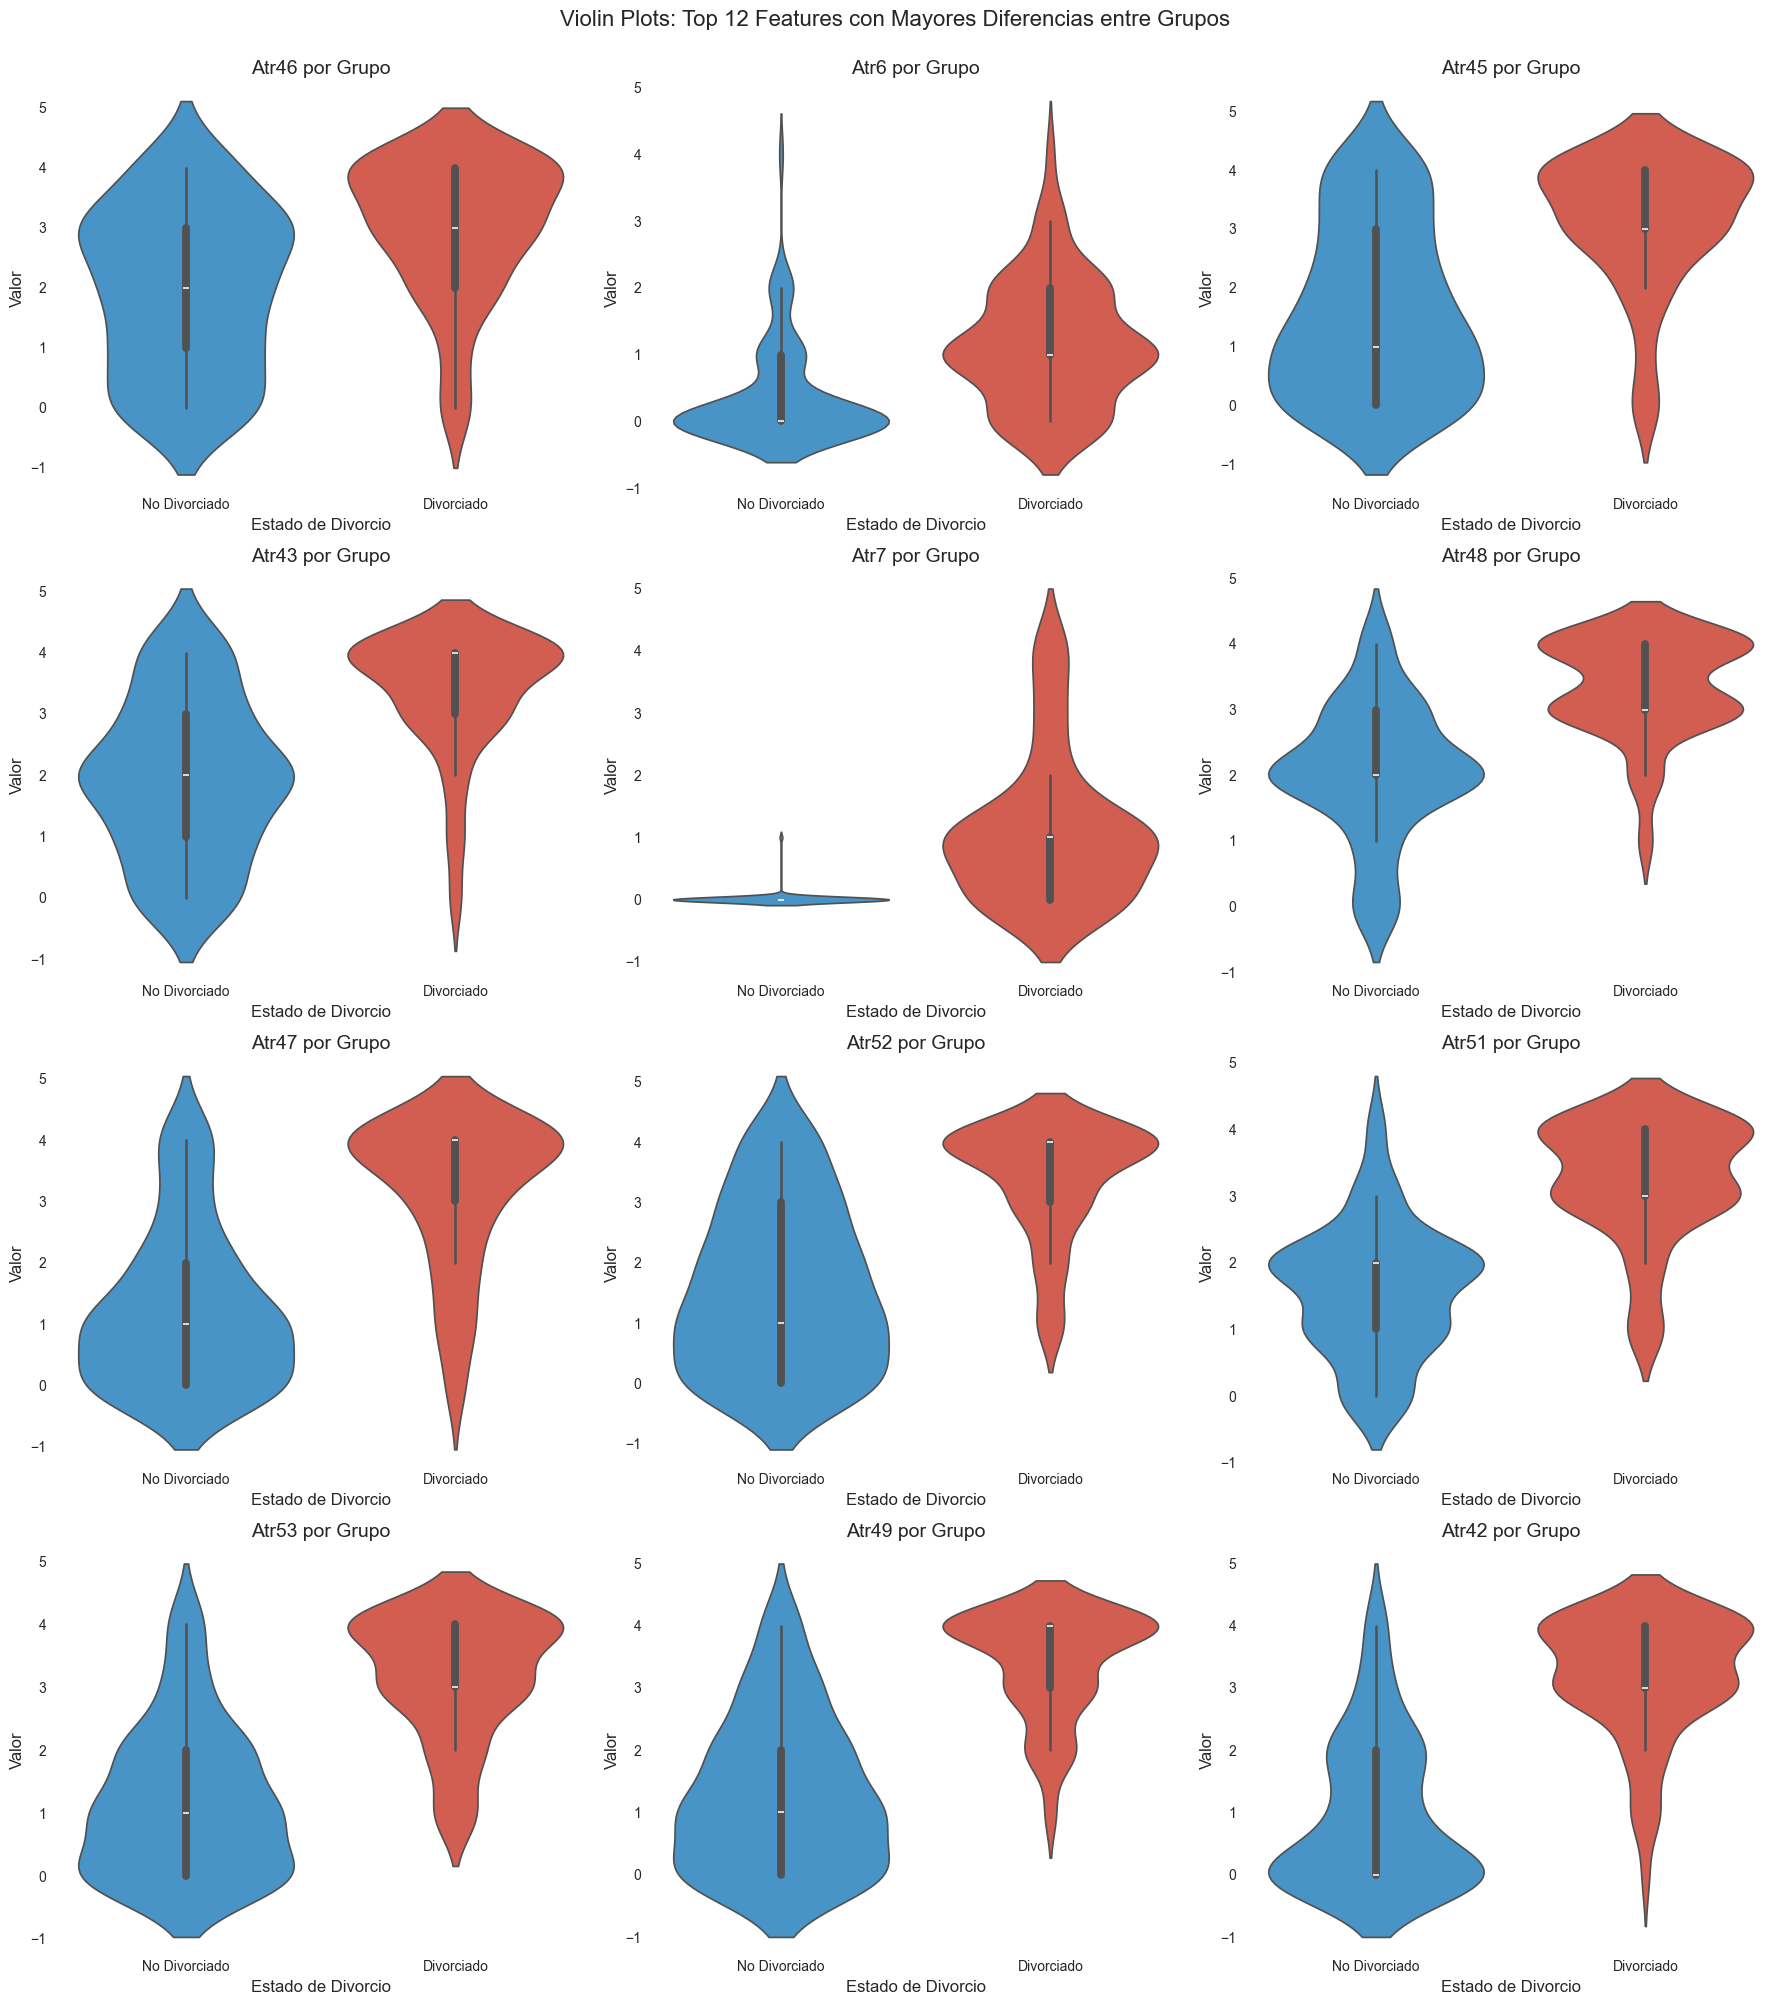

✅ Violin plots de top features creados


In [8]:
# Violin plots para las top 12 features con mayores diferencias
# Cargar estadísticas de comparación
comparison_stats = pd.read_csv('../data/processed/group_comparison_statistics.csv')
top_features = comparison_stats.nlargest(12, 'cliffs_delta')['feature'].tolist()

fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    plot_by_group(df, feature, ax=axes[idx])

plt.suptitle('Violin Plots: Top 12 Features con Mayores Diferencias entre Grupos', 
             fontsize=16, y=1.00)
plt.tight_layout()
save_plot(fig, 'violin_plots_top_features.png')
plt.show()

print("✅ Violin plots de top features creados")

## 5. Análisis de Asimetría (Skewness)

Visualizamos la asimetría de todas las features para identificar distribuciones sesgadas.

💾 Gráfico guardado: ../visualizations/univariate/skewness_summary.png


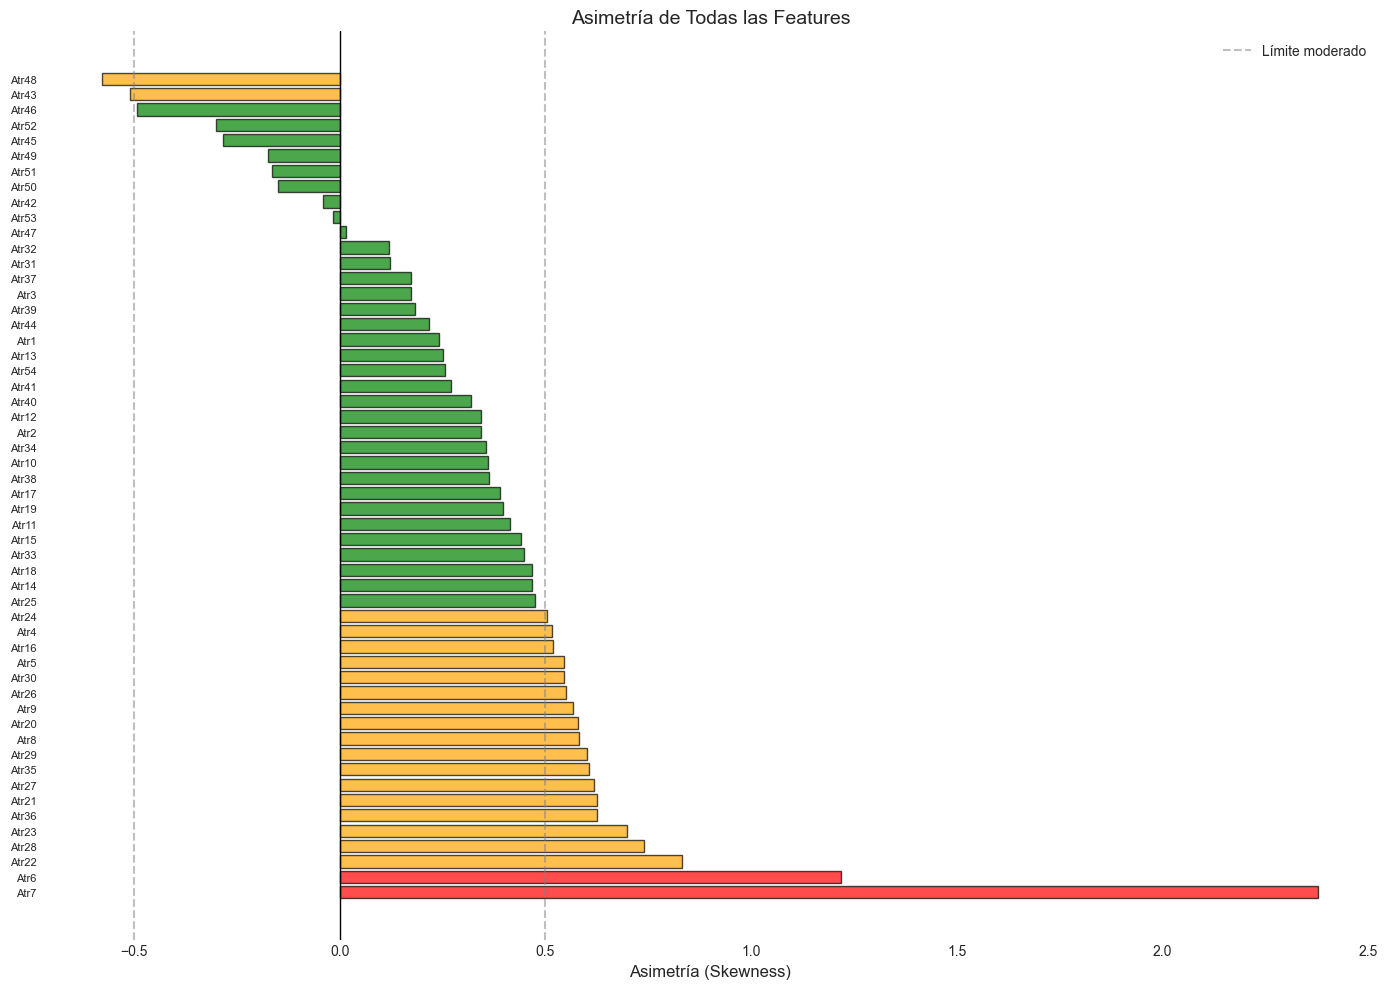


📊 Resumen de Asimetría:
   Features con asimetría fuerte (|skew| > 1): 2
   Features con asimetría moderada (0.5 < |skew| < 1): 19
   Features aproximadamente simétricas (|skew| <= 0.5): 33


In [9]:
# Calcular asimetría para todas las features
skewness_data = pd.DataFrame({
    'Feature': features,
    'Skewness': [df[f].skew() for f in features]
}).sort_values('Skewness', ascending=False)

# Visualizar
fig, ax = plt.subplots(figsize=(14, 10))

colors = ['red' if abs(s) > 1 else 'orange' if abs(s) > 0.5 else 'green' 
          for s in skewness_data['Skewness']]

ax.barh(range(len(skewness_data)), skewness_data['Skewness'], color=colors, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(skewness_data)))
ax.set_yticklabels(skewness_data['Feature'], fontsize=8)
ax.set_xlabel('Asimetría (Skewness)', fontsize=FONT_SIZES['label'])
ax.set_title('Asimetría de Todas las Features', fontsize=FONT_SIZES['title'])
ax.axvline(0, color='black', linestyle='-', linewidth=1)
ax.axvline(-0.5, color='gray', linestyle='--', alpha=0.5, label='Límite moderado')
ax.axvline(0.5, color='gray', linestyle='--', alpha=0.5)
ax.grid(True, alpha=0.3, axis='x')
ax.legend()

plt.tight_layout()
save_plot(fig, 'skewness_summary.png')
plt.show()

print(f"\n📊 Resumen de Asimetría:")
print(f"   Features con asimetría fuerte (|skew| > 1): {(abs(skewness_data['Skewness']) > 1).sum()}")
print(f"   Features con asimetría moderada (0.5 < |skew| < 1): {((abs(skewness_data['Skewness']) > 0.5) & (abs(skewness_data['Skewness']) <= 1)).sum()}")
print(f"   Features aproximadamente simétricas (|skew| <= 0.5): {(abs(skewness_data['Skewness']) <= 0.5).sum()}")

## 6. Q-Q Plots - Evaluación de Normalidad

Los Q-Q plots nos ayudan a evaluar si las distribuciones se aproximan a una distribución normal.

💾 Gráfico guardado: ../visualizations/univariate/qq_plots_top_features.png


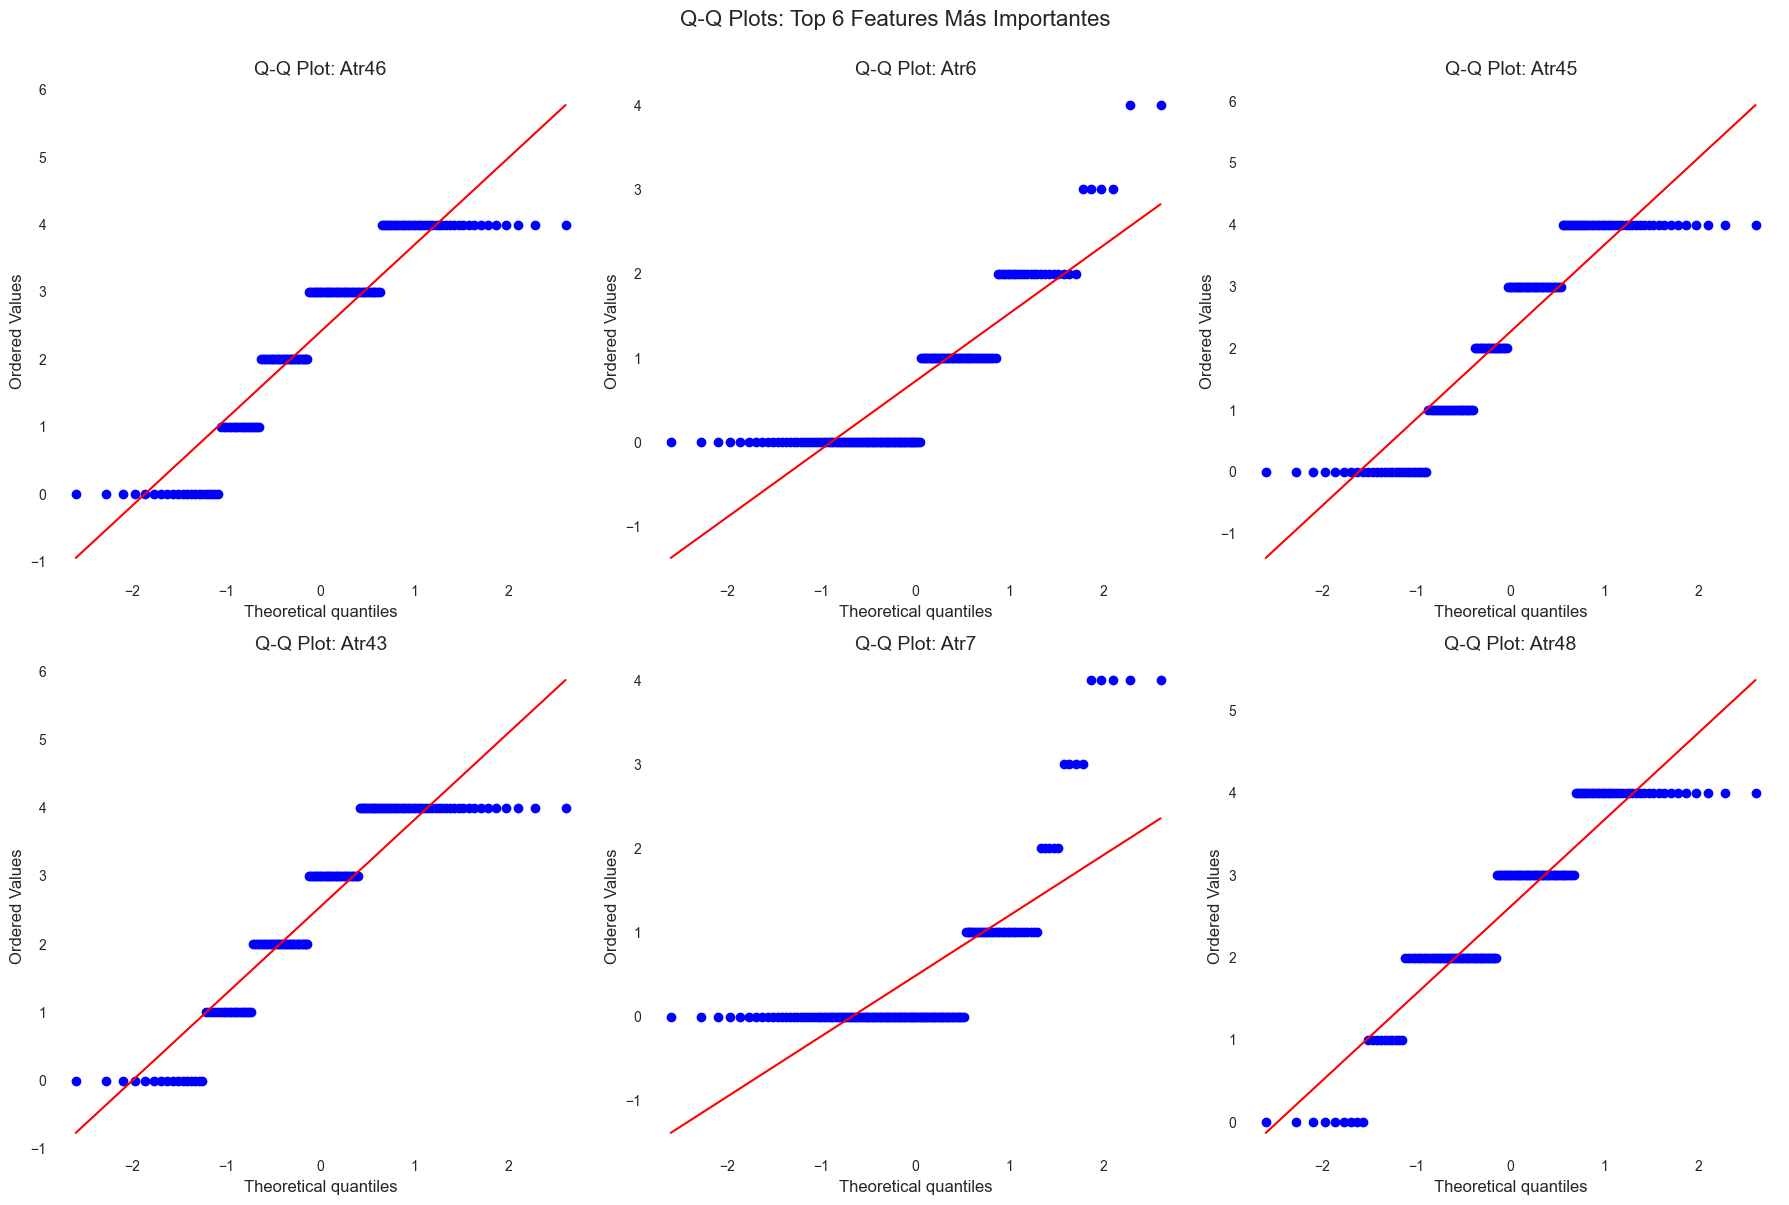

✅ Q-Q plots creados

💡 Interpretación:
   Si los puntos siguen la línea roja, la distribución es aproximadamente normal.
   Desviaciones indican distribuciones no normales (común en datos Likert).


In [10]:
# Q-Q plots para las top 6 features más importantes
top_6_features = top_features[:6]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, feature in enumerate(top_6_features):
    create_qq_plot(df, feature, ax=axes[idx])

plt.suptitle('Q-Q Plots: Top 6 Features Más Importantes', fontsize=16, y=1.00)
plt.tight_layout()
save_plot(fig, 'qq_plots_top_features.png')
plt.show()

print("✅ Q-Q plots creados")
print("\n💡 Interpretación:")
print("   Si los puntos siguen la línea roja, la distribución es aproximadamente normal.")
print("   Desviaciones indican distribuciones no normales (común en datos Likert).")

## 7. Histogramas Superpuestos - Comparación Directa

Comparamos las distribuciones de ambos grupos en el mismo gráfico para las features más discriminativas.

💾 Gráfico guardado: ../visualizations/univariate/overlayed_histograms_top_features.png


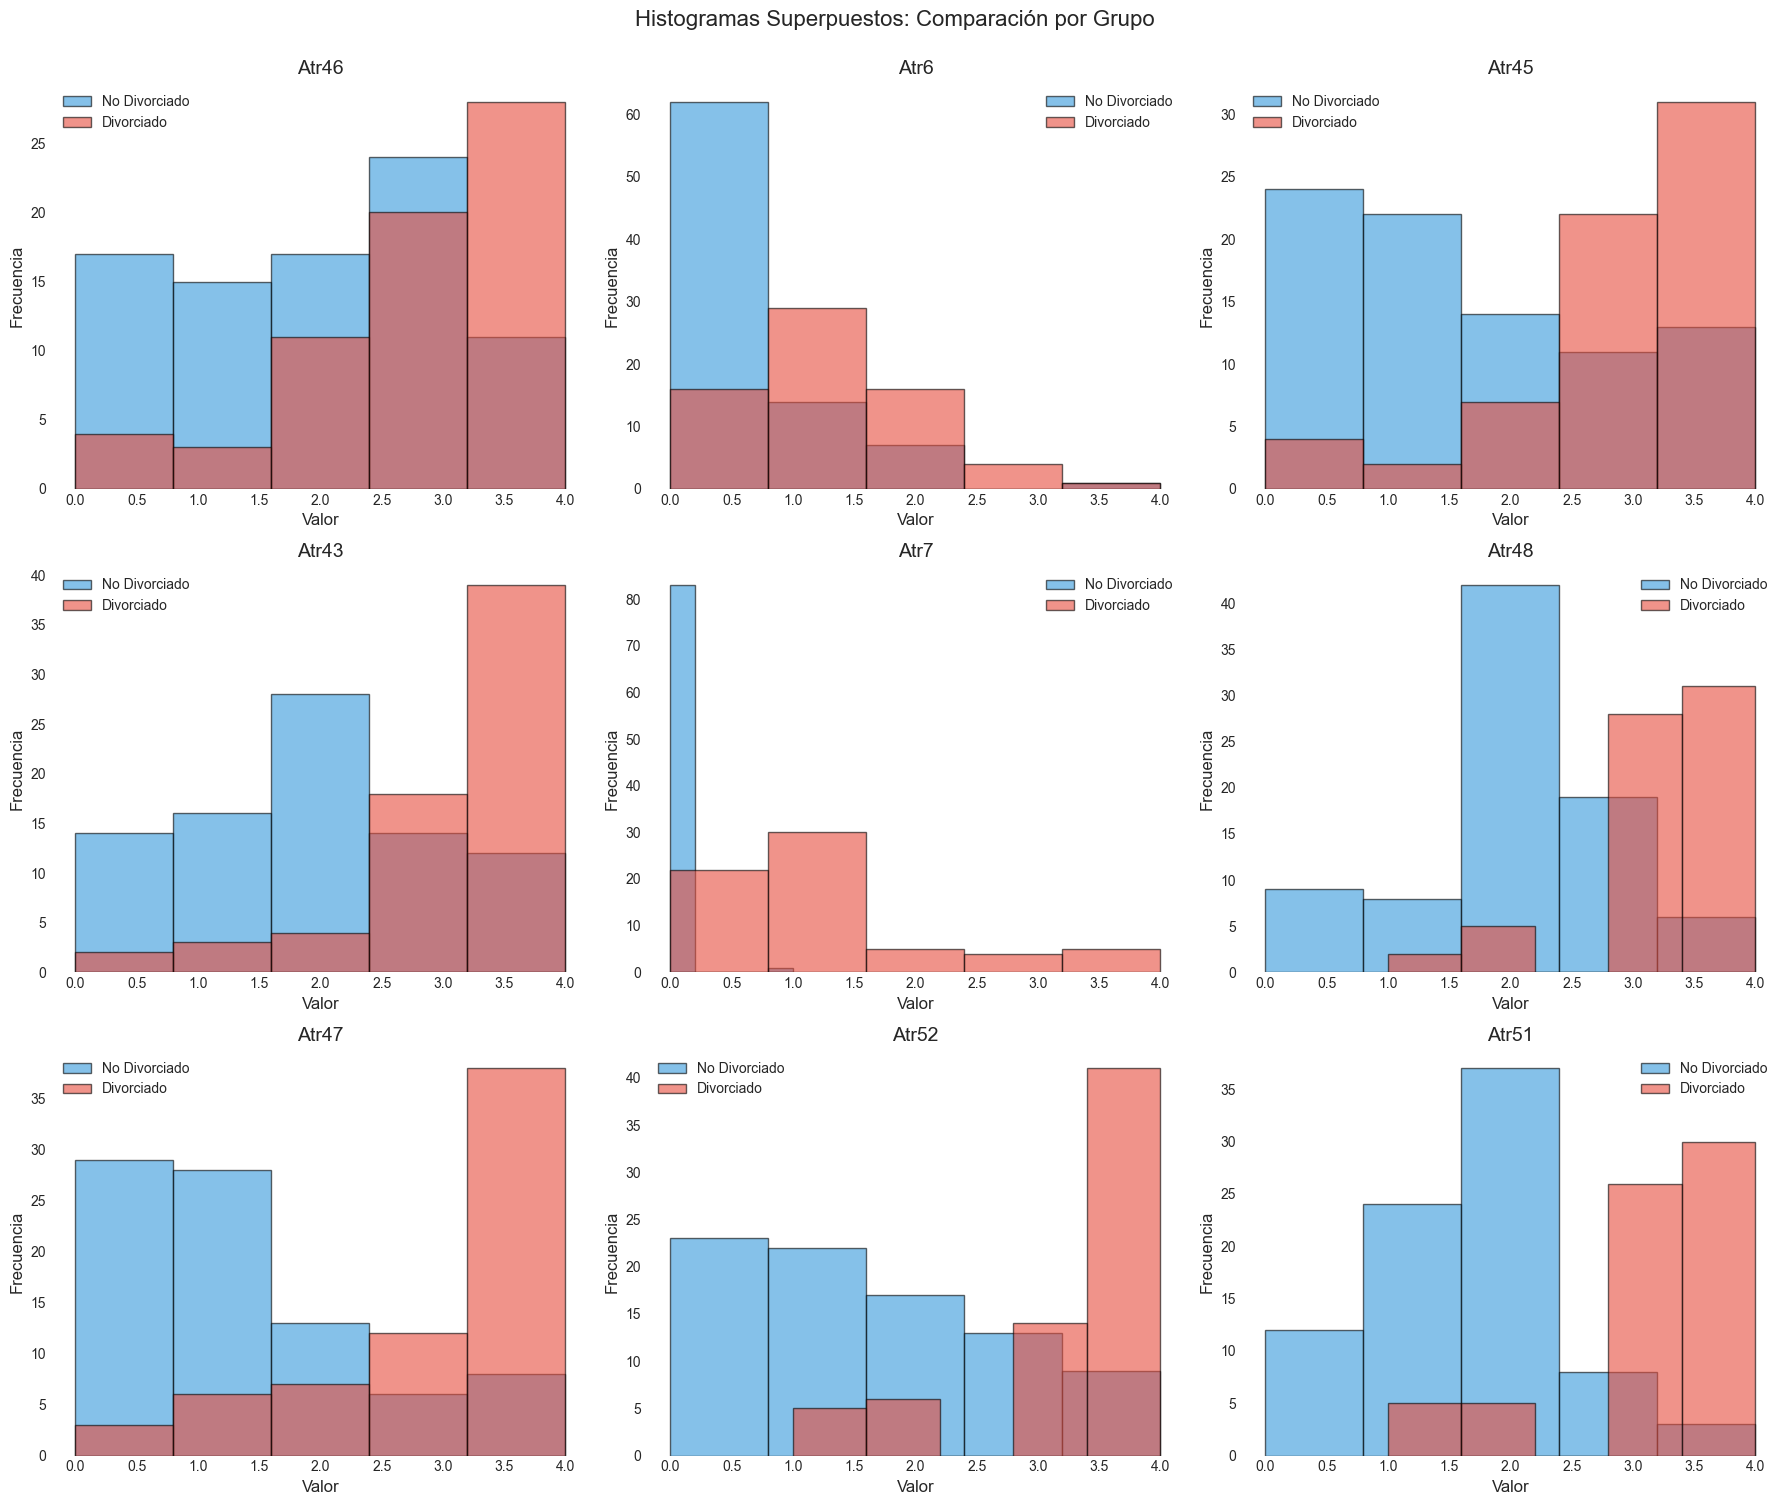

✅ Histogramas superpuestos creados


In [11]:
# Histogramas superpuestos para top 9 features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, feature in enumerate(top_features[:9]):
    # Separar por grupo
    no_divorce = df[df['Divorce'] == 0][feature]
    divorce = df[df['Divorce'] == 1][feature]
    
    # Plotear histogramas superpuestos
    axes[idx].hist(no_divorce, bins=5, alpha=0.6, label='No Divorciado', 
                   color=COLORS['no_divorce'], edgecolor='black')
    axes[idx].hist(divorce, bins=5, alpha=0.6, label='Divorciado', 
                   color=COLORS['divorce'], edgecolor='black')
    
    axes[idx].set_xlabel('Valor', fontsize=FONT_SIZES['label'])
    axes[idx].set_ylabel('Frecuencia', fontsize=FONT_SIZES['label'])
    axes[idx].set_title(f'{feature}', fontsize=FONT_SIZES['title'])
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Histogramas Superpuestos: Comparación por Grupo', fontsize=16, y=1.00)
plt.tight_layout()
save_plot(fig, 'overlayed_histograms_top_features.png')
plt.show()

print("✅ Histogramas superpuestos creados")

## Conclusiones del Análisis Univariado

### Hallazgos Principales

1. **Variable Objetivo**
   - El dataset está relativamente balanceado entre clases
   - Esto facilita el modelado sin necesidad de técnicas de balanceo

2. **Distribuciones de Features**
   - La mayoría de las features muestran distribuciones **no normales**
   - Muchas features tienen **asimetría positiva** (sesgo hacia valores bajos)
   - Esto es esperado en datos de escala Likert ordinal

3. **Diferencias entre Grupos**
   - Las features con mayor poder discriminativo muestran **clara separación** entre grupos
   - Los violin plots revelan que el grupo divorciado tiende a valores más altos
   - Esto sugiere que respuestas más extremas están asociadas con divorcio

4. **Outliers**
   - Pocos outliers estadísticos detectados
   - Los valores extremos (0 y 4) son **respuestas válidas** en la escala Likert
   - No se recomienda eliminar estos valores

### Implicaciones para Modelado

1. **Métodos No Paramétricos**
   - Las distribuciones no normales justifican el uso de algoritmos basados en árboles
   - Random Forest, XGBoost serían apropiados

2. **Selección de Features**
   - Las features con mayor separación visual son candidatas importantes
   - Considerar análisis de importancia de features

3. **Transformaciones**
   - No se recomiendan transformaciones (datos ordinales)
   - Mantener escala original para interpretabilidad